In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel('datos_act.xlsx')

In [3]:
df.head()

Edad Sexo  Estatura  Num Zapato En una relacion Trabajo Color Favorito
0    23    M       157          24              NO      NO          VERDE
1    25    H       174          27              NO      NO          VERDE
2    22    H       165          26              NO      NO          NEGRO
3    21    H       187          29              NO      NO           AZUL
4    23    M       163          25              SI      SI           ROJO

In [4]:
df.describe()

Edad    Estatura  Num Zapato
count  58.000000   58.000000   58.000000
mean   21.758621  167.293103   25.724138
std     1.689081    9.801555    1.814108
min    20.000000  150.000000   22.000000
25%    21.000000  160.000000   25.000000
50%    21.000000  167.000000   25.000000
75%    22.000000  174.000000   27.000000
max    32.000000  187.000000   30.000000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf6a3202b0>,
      dtype=object)

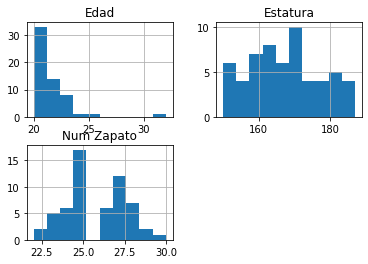

In [5]:
df.hist()

In [6]:
list(df.columns)

['Edad',
 'Sexo',
 'Estatura',
 'Num Zapato',
 'En una relacion',
 'Trabajo',
 'Color Favorito']

In [7]:
varc = ['Edad',
 'Estatura',
 'Num Zapato']
vard = ['Sexo','En una relacion',
 'Trabajo',
 'Color Favorito']

In [8]:
for v in vard:
    print(df[v].value_counts(True))
    print("\n")

H    0.517241
M    0.482759
Name: Sexo, dtype: float64


NO    0.5
SI    0.5
Name: En una relacion, dtype: float64


NO    0.810345
SI    0.189655
Name: Trabajo, dtype: float64


AZUL        0.413793
NEGRO       0.120690
ROSA        0.086207
ROJO        0.086207
VERDE       0.086207
MORADO      0.068966
GRIS        0.068966
BLANCO      0.034483
NARANJA     0.017241
AMARILLO    0.017241
Name: Color Favorito, dtype: float64




In [9]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [10]:
X =df[varc].copy()

In [11]:
sc = StandardScaler()
sc.fit(X)
Xs = pd.DataFrame(sc.transform(X),columns=varc)

In [12]:
sc = MinMaxScaler()
sc.fit(X)
Xm= pd.DataFrame(sc.transform(X),columns=varc)

In [13]:
Xm.describe()

Edad   Estatura  Num Zapato
count  58.000000  58.000000   58.000000
mean    0.146552   0.467381    0.465517
std     0.140757   0.264907    0.226763
min     0.000000   0.000000    0.000000
25%     0.083333   0.270270    0.375000
50%     0.083333   0.459459    0.375000
75%     0.166667   0.648649    0.625000
max     1.000000   1.000000    1.000000

In [14]:
pca = PCA(n_components=2)
pca.fit(Xs)
print(pca.explained_variance_ratio_.cumsum())
Xp = pd.DataFrame(pca.transform(Xs),columns=['p1','p2'])

[0.66475063 0.959606  ]


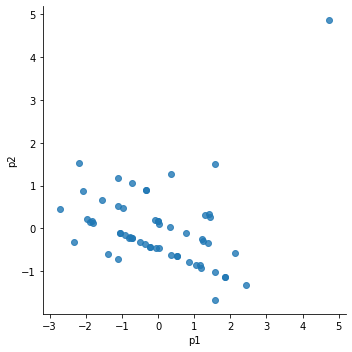

In [15]:
sns.lmplot(data=Xp,x='p1',y='p2',fit_reg=False)

In [16]:
lst = []
for k in range(2,10):
    cl = KMeans(n_clusters=k)
    cl.fit(Xm)
    lst.append(cl.inertia_)

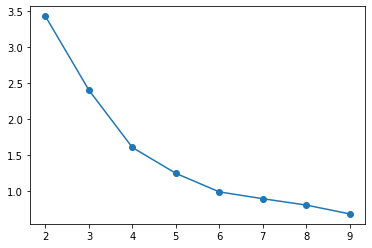

In [17]:
plt.plot(range(2,10),lst,marker='o')

In [18]:
cl = KMeans(n_clusters=4)
cl.fit(Xm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [19]:
df['cl']=X['cl']=Xp['cl']=Xm['cl']=cl.predict(Xm)

In [20]:
df.tail()

Edad Sexo  Estatura  Num Zapato En una relacion Trabajo Color Favorito  cl
53    21    H       170          27              NO      NO           AZUL   1
54    22    H       170          26              SI      SI           AZUL   0
55    22    H       178          27              NO      SI           AZUL   1
56    20    H       183          28              NO      NO           ROJO   1
57    32    H       184          30              SI      SI         MORADO   3

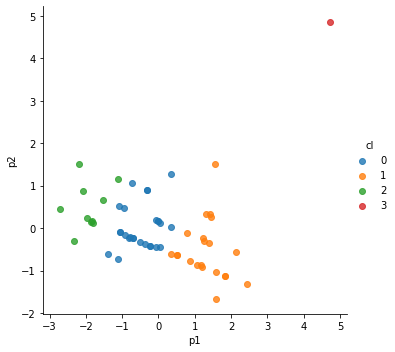

In [21]:
sns.lmplot(data=Xp,x='p1',y='p2',fit_reg=False,hue='cl')

In [22]:
df.head()

Edad Sexo  Estatura  Num Zapato En una relacion Trabajo Color Favorito  cl
0    23    M       157          24              NO      NO          VERDE   2
1    25    H       174          27              NO      NO          VERDE   1
2    22    H       165          26              NO      NO          NEGRO   0
3    21    H       187          29              NO      NO           AZUL   1
4    23    M       163          25              SI      SI           ROJO   0

In [25]:
df[varc+['cl']].groupby('cl').mean()

Edad    Estatura  Num Zapato
cl                                   
0   21.538462  163.884615   25.153846
1   21.666667  177.095238   27.476190
2   21.500000  153.900000   23.100000
3   32.000000  184.000000   30.000000

In [28]:
df[varc].mean().to_frame().T

Edad    Estatura  Num Zapato
0  21.758621  167.293103   25.724138

In [52]:
for v in vard:
    aux = df[['cl',v,'Edad']].copy()
    aux = aux.pivot_table(index='cl',
                          columns=v,
                          aggfunc='count',
                          values='Edad',
                          fill_value=0)

    cat = list(aux.columns)

    aux['T'] = aux[cat].sum(axis=1)

    for c in cat:
        aux[c]/=aux['T']

    aux.drop('T',axis=1,inplace=True)

    print (aux)
    print('\n')

Sexo         H         M
cl                      
0     0.346154  0.653846
1     0.952381  0.047619
2     0.000000  1.000000
3     1.000000  0.000000


En una relacion        NO        SI
cl                                 
0                0.384615  0.615385
1                0.666667  0.333333
2                0.500000  0.500000
3                0.000000  1.000000


Trabajo        NO        SI
cl                         
0        0.846154  0.153846
1        0.809524  0.190476
2        0.800000  0.200000
3        0.000000  1.000000


Color Favorito  AMARILLO      AZUL    BLANCO      GRIS    MORADO   NARANJA  \
cl                                                                           
0               0.038462  0.346154  0.000000  0.153846  0.038462  0.000000   
1               0.000000  0.571429  0.047619  0.000000  0.000000  0.047619   
2               0.000000  0.300000  0.100000  0.000000  0.200000  0.000000   
3               0.000000  0.000000  0.000000  0.000000  1.000000  0.00

In [53]:
df[varc].corr()

Edad  Estatura  Num Zapato
Edad        1.000000  0.213108    0.269887
Estatura    0.213108  1.000000    0.876834
Num Zapato  0.269887  0.876834    1.000000

In [54]:
from sklearn.feature_selection import SelectKBest

In [55]:
sk = SelectKBest(k=2)

In [57]:
sk.fit(df[varc],df['cl'])

SelectKBest(k=2, score_func=<function f_classif at 0x7fbf5ffe9730>)

In [61]:
best = [x for x,y in zip(varc,sk.get_support()) if y]

In [62]:
best

['Estatura', 'Num Zapato']